#Ejemplo de KNN vecinos.

##PRIMERA PARTE 

La visualizacion de los datos pruebas para este ejemplo que esta en load_iris(), para poder hacer las simulaciones como se hace este entrenamiento.

In [0]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar el conjunto de datos Iris
iris = load_iris()

# Crear un DataFrame con las características
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Agregar las etiquetas al DataFrame
df['species'] = iris.target

# Mostrar las primeras filas del DataFrame
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [0]:
# Mapeo de etiquetas numéricas a nombres de especies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Mostrar las primeras filas con los nombres de las especies
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [0]:
# Imprimir nombres de las características y clases
print("Características (columnas):", iris.feature_names)
print("Clases (especies):", iris.target_names)

# Mostrar un resumen del DataFrame
df.info()


Características (columnas): ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Clases (especies): ['setosa' 'versicolor' 'virginica']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


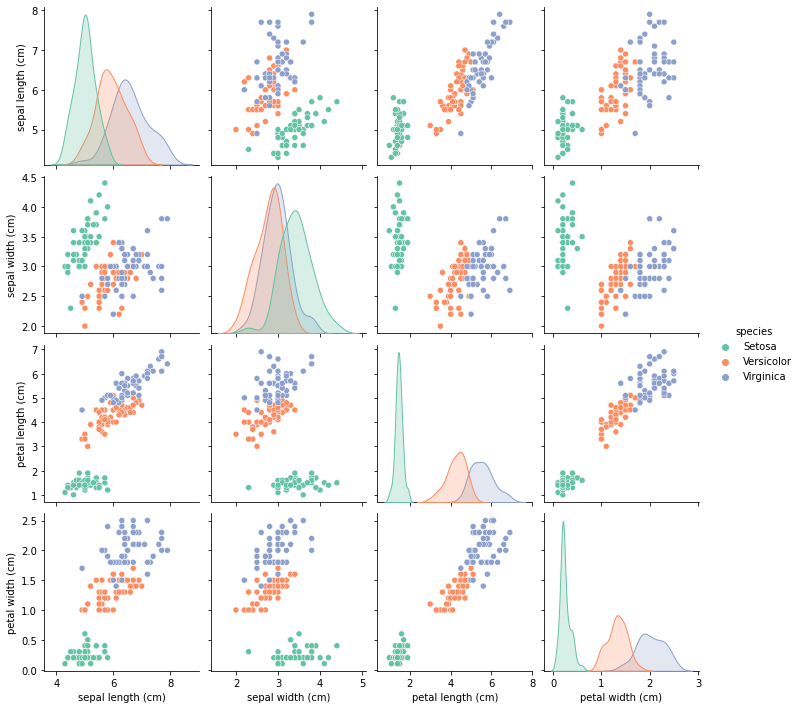

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de pares para visualizar las características
sns.pairplot(df, hue='species', diag_kind='kde', palette='Set2')
plt.show()


El pairplot genera una cuadrícula de gráficos donde:

* Cada fila y columna representa una característica del conjunto de datos load_iris():
 sepal length (cm), sepal width (cm), petal length (cm), petal width (cm).
* En las celdas fuera de la diagonal:
Muestra gráficos de dispersión entre dos características diferentes (por ejemplo, largo del pétalo vs ancho del sépalo).
* En las celdas de la diagonal:
Muestra un gráfico de densidad (KDE) para representar la distribución de una característica individual.

## Interpretacion.
1. Distribuciones individuales:

* En la diagonal principal, puedes observar cómo cada característica se distribuye para cada clase (Setosa, Versicolor, Virginica).
* Por ejemplo, si una clase tiene un pico muy definido y separado en una característica, esa característica puede ser útil para clasificarla.

2. Relaciones entre características:

* Fuera de la diagonal, los gráficos de dispersión muestran cómo se relacionan dos características.
Por ejemplo:
* Si los puntos de diferentes clases están claramente separados en un gráfico de dispersión, esas características son útiles para diferenciar entre las clases.
* Si los puntos están mezclados, esas características no son tan útiles para clasificar.

3. Colores por clase:

Los puntos están coloreados según la clase (species), lo que facilita visualizar cómo se agrupan las especies en el espacio de características.


En el caso de Iris, puedes notar:

Setosa (verde): Tiende a estar bien separada de las otras dos especies en casi todas las combinaciones de características.
Versicolor (naranja) y Virginica (azul): Están más mezcladas, especialmente en algunas combinaciones como sepal length y sepal width.

# SEGUNDA PARTE

Se hace la simulacion como funciona el algoritmo para ver como funciona KNN vecinos.

In [0]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Cargar el conjunto de datos Iris
iris = load_iris()

# Dividir los datos en características (X) y etiquetas (y)
X = iris.data  # Características: longitud y ancho de pétalo y sépalo
y = iris.target  # Etiquetas: 0 (Setosa), 1 (Versicolor), 2 (Virginica)

# Dividir el conjunto de datos en entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Datos de entrenamiento:", X_train.shape)
print("Datos de prueba:", X_test.shape)


Datos de entrenamiento: (105, 4)
Datos de prueba: (45, 4)


In [0]:
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN con K=3 (3 vecinos más cercanos)
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

# Entrenar el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

print("Modelo KNN entrenado con K =", k)


Modelo KNN entrenado con K = 3


In [0]:
from sklearn.metrics import accuracy_score

# Predecir las etiquetas para los datos de prueba
y_pred = knn.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del modelo: {accuracy:.2f}")


Precisión del modelo: 1.00


In [0]:
# Características de una nueva flor: longitud y ancho de pétalo y sépalo
nueva_flor = [[5.0, 3.6, 1.4, 0.2]]  # Ejemplo

# Predecir la especie
prediccion = knn.predict(nueva_flor)
print(f"La nueva flor pertenece a la especie: {iris.target_names[prediccion][0]}")


La nueva flor pertenece a la especie: setosa


In [0]:
# Características de una nueva flor: longitud y ancho de pétalo y sépalo
nueva_flor = [[6.0, 2.8, 4.5, 1.3]] # Ejemplo

# Predecir la especie
prediccion = knn.predict(nueva_flor)
print(f"La nueva flor pertenece a la especie: {iris.target_names[prediccion][0]}")


La nueva flor pertenece a la especie: versicolor


In [0]:
# Características de una nueva flor
# Cambia los valores aquí para probar otras especies
nueva_flor = [[6.7, 3.0, 5.2, 2.3]]  # Ejemplo para Versicolor

# Predecir la especie
prediccion = knn.predict(nueva_flor)
print(f"La nueva flor pertenece a la especie: {iris.target_names[prediccion][0]}")


La nueva flor pertenece a la especie: virginica


#Visualizacion de datos originales

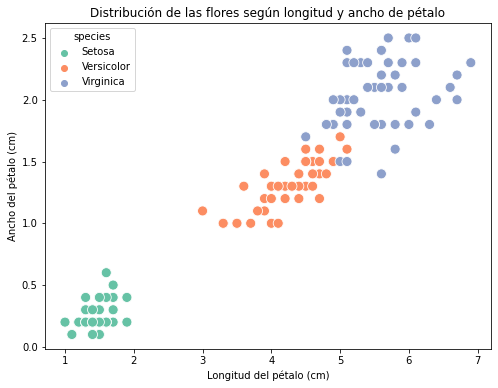

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convertir los datos a un DataFrame
import pandas as pd
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

# Mapear las etiquetas a nombres de especies
df['species'] = df['species'].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

# Gráfico de dispersión de dos características
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=df['petal length (cm)'], 
    y=df['petal width (cm)'], 
    hue=df['species'], 
    palette='Set2', 
    s=100
)
plt.title("Distribución de las flores según longitud y ancho de pétalo")
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.show()


#Visulazar los vecinos mas cercanos.

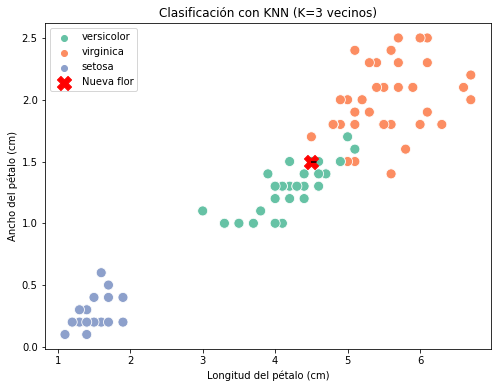

In [0]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

# Crear el modelo KNN y entrenarlo
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train[:, 2:], y_train)  # Usamos solo las columnas de pétalo para visualizar

# Nueva flor (prueba con diferentes valores)
nueva_flor = [[4.5, 1.5]]  # Solo petal length y petal width
prediccion = knn.predict(nueva_flor)

# Graficar los datos originales
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=X_train[:, 2], 
    y=X_train[:, 3], 
    hue=[iris.target_names[i] for i in y_train], 
    palette='Set2', 
    s=100
)

# Graficar la nueva flor
plt.scatter(nueva_flor[0][0], nueva_flor[0][1], color='red', label='Nueva flor', s=200, marker='X')

# Calcular las distancias a los vecinos más cercanos
distancias, indices = knn.kneighbors(nueva_flor)

# Conectar con líneas la nueva flor y sus vecinos
for i in indices[0]:
    plt.plot([nueva_flor[0][0], X_train[i, 2]], [nueva_flor[0][1], X_train[i, 3]], 'k--')

# Ajustar la gráfica
plt.title(f"Clasificación con KNN (K={k} vecinos)")
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.legend()
plt.show()


#visualizar las flores

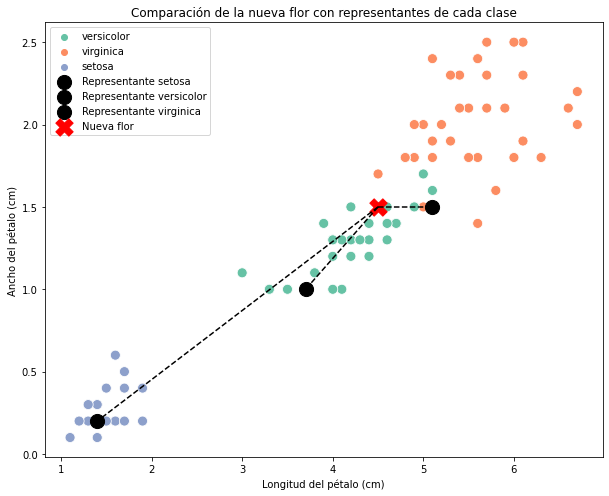

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Crear un modelo KNN con K=3
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train[:, 2:], y_train)  # Usamos las columnas petal length y petal width

# Nueva flor que queremos clasificar
nueva_flor = [[4.5, 1.5]]  # Solo petal length y petal width
prediccion = knn.predict(nueva_flor)

# Elegir un punto representativo de cada especie
representantes = {
    0: X_train[y_train == 0][:, 2:],  # Setosa
    1: X_train[y_train == 1][:, 2:],  # Versicolor
    2: X_train[y_train == 2][:, 2:],  # Virginica
}

representantes_puntos = {key: val[0] for key, val in representantes.items()}

# Graficar los datos originales
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_train[:, 2], 
    y=X_train[:, 3], 
    hue=[iris.target_names[i] for i in y_train], 
    palette='Set2', 
    s=100
)

# Graficar los representantes de cada especie
for especie, punto in representantes_puntos.items():
    plt.scatter(
        punto[0], 
        punto[1], 
        color='black', 
        label=f'Representante {iris.target_names[especie]}', 
        s=200, 
        marker='o'
    )
    plt.plot([nueva_flor[0][0], punto[0]], [nueva_flor[0][1], punto[1]], 'k--')

# Graficar la nueva flor
plt.scatter(nueva_flor[0][0], nueva_flor[0][1], color='red', label='Nueva flor', s=300, marker='X')

# Ajustar la gráfica
plt.title("Comparación de la nueva flor con representantes de cada clase")
plt.xlabel("Longitud del pétalo (cm)")
plt.ylabel("Ancho del pétalo (cm)")
plt.legend()
plt.show()


##Descripción del gráfico.

Datos de entrenamiento: Todas las flores del conjunto de entrenamiento, separadas por colores según su especie.

Representantes (círculos negros): Un punto de cada clase, seleccionado como representante.

Nueva flor (cruz roja): El punto que estás clasificando.
Líneas punteadas negras: Distancias entre la nueva flor y cada representante.

##Interpretación

Si la nueva flor está más cerca del representante de una especie específica, es probable que pertenezca a esa especie.
